# TEXT EMOTION DETECTION

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

### Loading the dataset

In [18]:
df = pd.read_csv("C:/Zintern/python/Text-Emotion-Detection-main/data/emotion-dataset.csv")
# df = pd.read_csv("C:/Zintern/python/Text-Emotion-Detection-main/data/tweet_emotions.csv")

In [19]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,Happy,Sage Act upgrade on my to do list for tommorow.
2,sad,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,Happy,Such an eye ! The true hazel eye-and so brill...
4,Happy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [20]:
df['Emotion'].value_counts()

Emotion
Happy       10978
sad          6686
fear         5373
anger        4279
surprise     4041
neutral      2239
disgust       846
shame         145
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

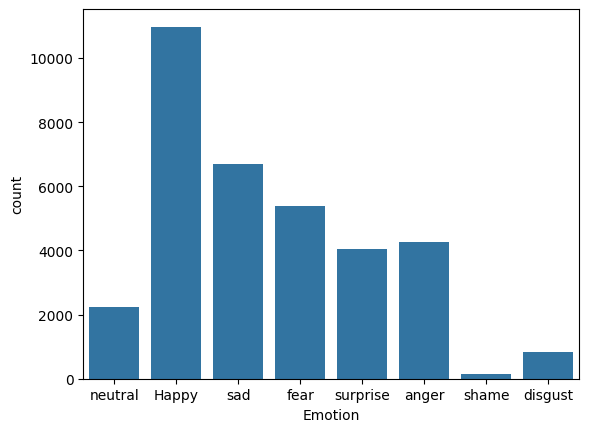

In [21]:
sns.countplot(x='Emotion',data=df)

### Data pre-processing

In [22]:
import neattext
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [23]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [24]:
# Remove the stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [25]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,Happy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sad,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,Happy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,Happy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34582,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34583,Happy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34584,anger,A man robbed me today .,man robbed today .
34585,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


### Splitting data into input variables and target variable

In [26]:
x = df['Clean_Text']
y = df['Emotion']

### Splitting data into train and test set

### Training the model

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6325527609135588

In [30]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc', SVC(kernel = 'rbf', C = 10))])
pipe_svm.fit(x_train,y_train)
pipe_svm.score(x_test,y_test)

0.6309145225016864

In [31]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf', RandomForestClassifier(n_estimators=10))])
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.5719379396742796

### Saving the model

In [32]:
import joblib
pipeline_file = open("text_emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()